# Unequal variance modle with multiple criterions

### Here we have high and low confidence 

In [1]:
# initialising
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import seaborn as sns
# from examtoolbox import *

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

n_experiments = 100
n_trials = 50
n_participants = 1


# Bias towards no answer (0 is 100% yes, 1 is 100% no, 0.5 is 50% each)
# C 1: yes = yes_high, no = everything else
# C 2: yes = yes_high + yes_low, no = no_high + no_low
# C 3: yes = yes_high + yes_low + no_low, no = no_high

sigma_list = []
mu_list = []

x_es = []
y_es = []



In [3]:


for i in range(n_experiments):
    stim_choices = np.random.normal(1, 0.8,50)
    no_stim_choices = np.random.normal(0, 1 ,50)

    yes_high_s =    sum([1 if i >= 0.8 else 0 for i in stim_choices])
    yes_low_s =     sum([1 if i < 0.8 and i > 0.5 else 0 for i in stim_choices])
    no_low_s =      sum([1 if i > 0.2 and i <= 0.5 else 0 for i in stim_choices])
    no_high_s =     sum([1 if i <= 0.2 else 0 for i in stim_choices])

    yes_high_s0 =   sum([1 if i >= 0.8 else 0 for i in no_stim_choices])
    yes_low_s0 =    sum([1 if i < 0.8 and i > 0.5 else 0 for i in no_stim_choices])
    no_low_s0 =     sum([1 if i > 0.2 and i <= 0.5 else 0 for i in no_stim_choices])
    no_high_s0 =    sum([1 if i <= 0.2 else 0 for i in no_stim_choices])


    tp_c1 = yes_high_s /n_trials
    tp_c2 = (yes_high_s + yes_low_s) /n_trials
    tp_c3 = (yes_high_s + yes_low_s + no_low_s) /n_trials


    fp_c1 = yes_high_s0 /n_trials
    fp_c2 = (yes_high_s0 + yes_low_s0) /n_trials
    fp_c3 = (yes_high_s0 + yes_low_s0 + no_low_s0) /n_trials

    y= np.array([norm.ppf(tp_c1), norm.ppf(tp_c2), norm.ppf(tp_c3)])
    x= np.array([norm.ppf(fp_c1), norm.ppf(fp_c2), norm.ppf(fp_c3)]).reshape((-1,1))

    x_es.append(x)
    y_es.append(y)
    
    model = LinearRegression().fit(x, y)
    intercept, slope = model.intercept_, model.coef_[0]

    sigma = 1/slope
    mu_ses = sigma*intercept

    sigma_list.append(sigma)
    mu_list.append(mu_ses)




c:\Users\bayka\Anaconda3\envs\katrine_personal_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


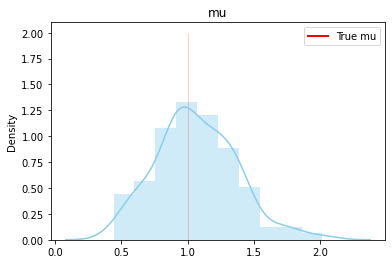

Text(0.5, 1.0, 'mu')

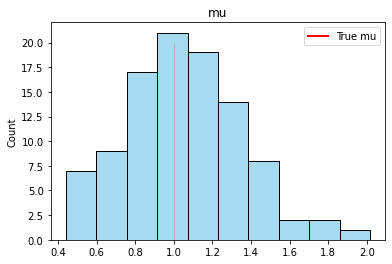

In [9]:
# The mu

import seaborn as sns
colors =["skyblue", "olive", "teal"]
sns.distplot( mu_list, color=colors[0])
sns.lineplot(x=1, y=[0,2], linewidth=2,color='red',  label='True mu')
plt.title('mu')
plt.show()
sns.histplot( mu_list, color=colors[0])
sns.lineplot(x=1, y=[0,20], linewidth=2,color='red',  label='True mu')
plt.title('mu')

c:\Users\bayka\Anaconda3\envs\katrine_personal_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


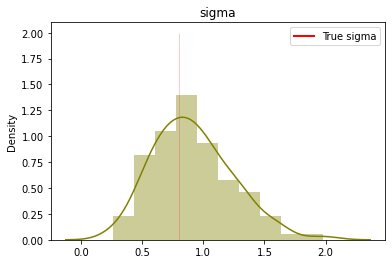

Text(0.5, 1.0, 'sigma')

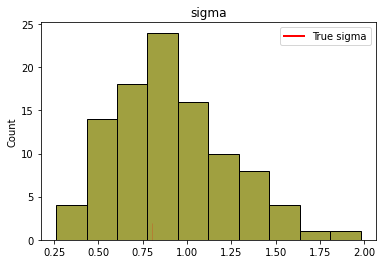

In [10]:
# the sigma
import seaborn as sns
colors =["skyblue", "olive", "teal"]
sns.distplot( sigma_list, color=colors[1])
sns.lineplot(x=0.8, y=[0,2], linewidth=2,color='red',  label='True sigma')
plt.title('sigma')
plt.show()
sns.histplot( sigma_list, color=colors[1])
sns.lineplot(x=0.8, y=[0,2], linewidth=2,color='red',  label='True sigma')
plt.title('sigma')

In [11]:
# the means of mu and sigma 
print(np.mean(mu_list), np.mean(sigma_list))

1.0662319773625746 0.9149833877414331
